1. Clone repos and install requirements

In [ ]:
!git clone https://github.com/CompVis/latent-diffusion.git
!git clone https://github.com/CompVis/taming-transformers
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 torchmetrics==0.11.4 --extra-index-url https://download.pytorch.org/whl/cu116 --no-cache-dir
!pip install pytorch_lightning==1.7.7

!pip install -e ./taming-transformers

!pip install ipywidgets omegaconf pytorch-lightning torch-fidelity einops

import sys
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

fatal: destination path 'latent-diffusion' already exists and is not an empty directory.
fatal: destination path 'taming-transformers' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.2.0
    Uninstalling torchmetrics-1.2.0:
      Successfully uninstalled torchmetrics-1.2.0
Obtaining file:///content/taming-transformers
  Preparing metadata (setup.py) ... done
  Attempting uninstall: taming-transformers
    Found existing installation: taming-transformers 0.0.1
    Uninstalling taming-transformers-0.0.1:
      Successfully uninstalled taming-transformers-0.0.1
  Running setup.py develop for taming-transformers


2. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [ ]:
%cd latent-diffusion
import ipywidgets as widgets
from IPython.display import display

mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

/content/latent-diffusion


Select(description='Task:', options=('superresolution',), value='superresolution')

3. Download model checkpoint ( takes ~ 3 Min) and load model


In [ ]:
from notebook_helpers import get_model
model = get_model(mode.value)

  0%|          | 0/1908 [00:00<?, ?it/s]

  0%|          | 0/2039822129 [00:00<?, ?it/s]

Loading model from logs/diffusion/superresolution_bsr/checkpoints/last.ckpt/?dl=1
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Upload your own conditioning image for superresolution (height and width have to take values in [128, 192, 256])

In [ ]:
from notebook_helpers import get_custom_cond
get_custom_cond(mode.value)

Saving low_res_bears.jpeg to low_res_bears.jpeg


4. Select conditioning from available examples or the uploaded custom conditioning

In [ ]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_fox_1.jpeg', 'custom_low_res_bears.jpeg', 'c…

5. Run Model

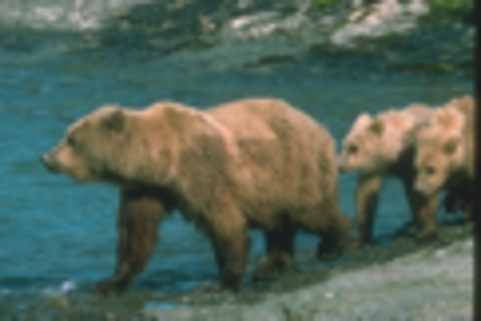

Plotting: Switched to EMA weights
Sampling with eta = 1.0; steps: 100
Data shape for DDIM sampling is (1, 3, 321, 481), eta 1.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


Plotting: Restored training weights


In [ ]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

6. Display Sample

(1, 1284, 1924, 3)


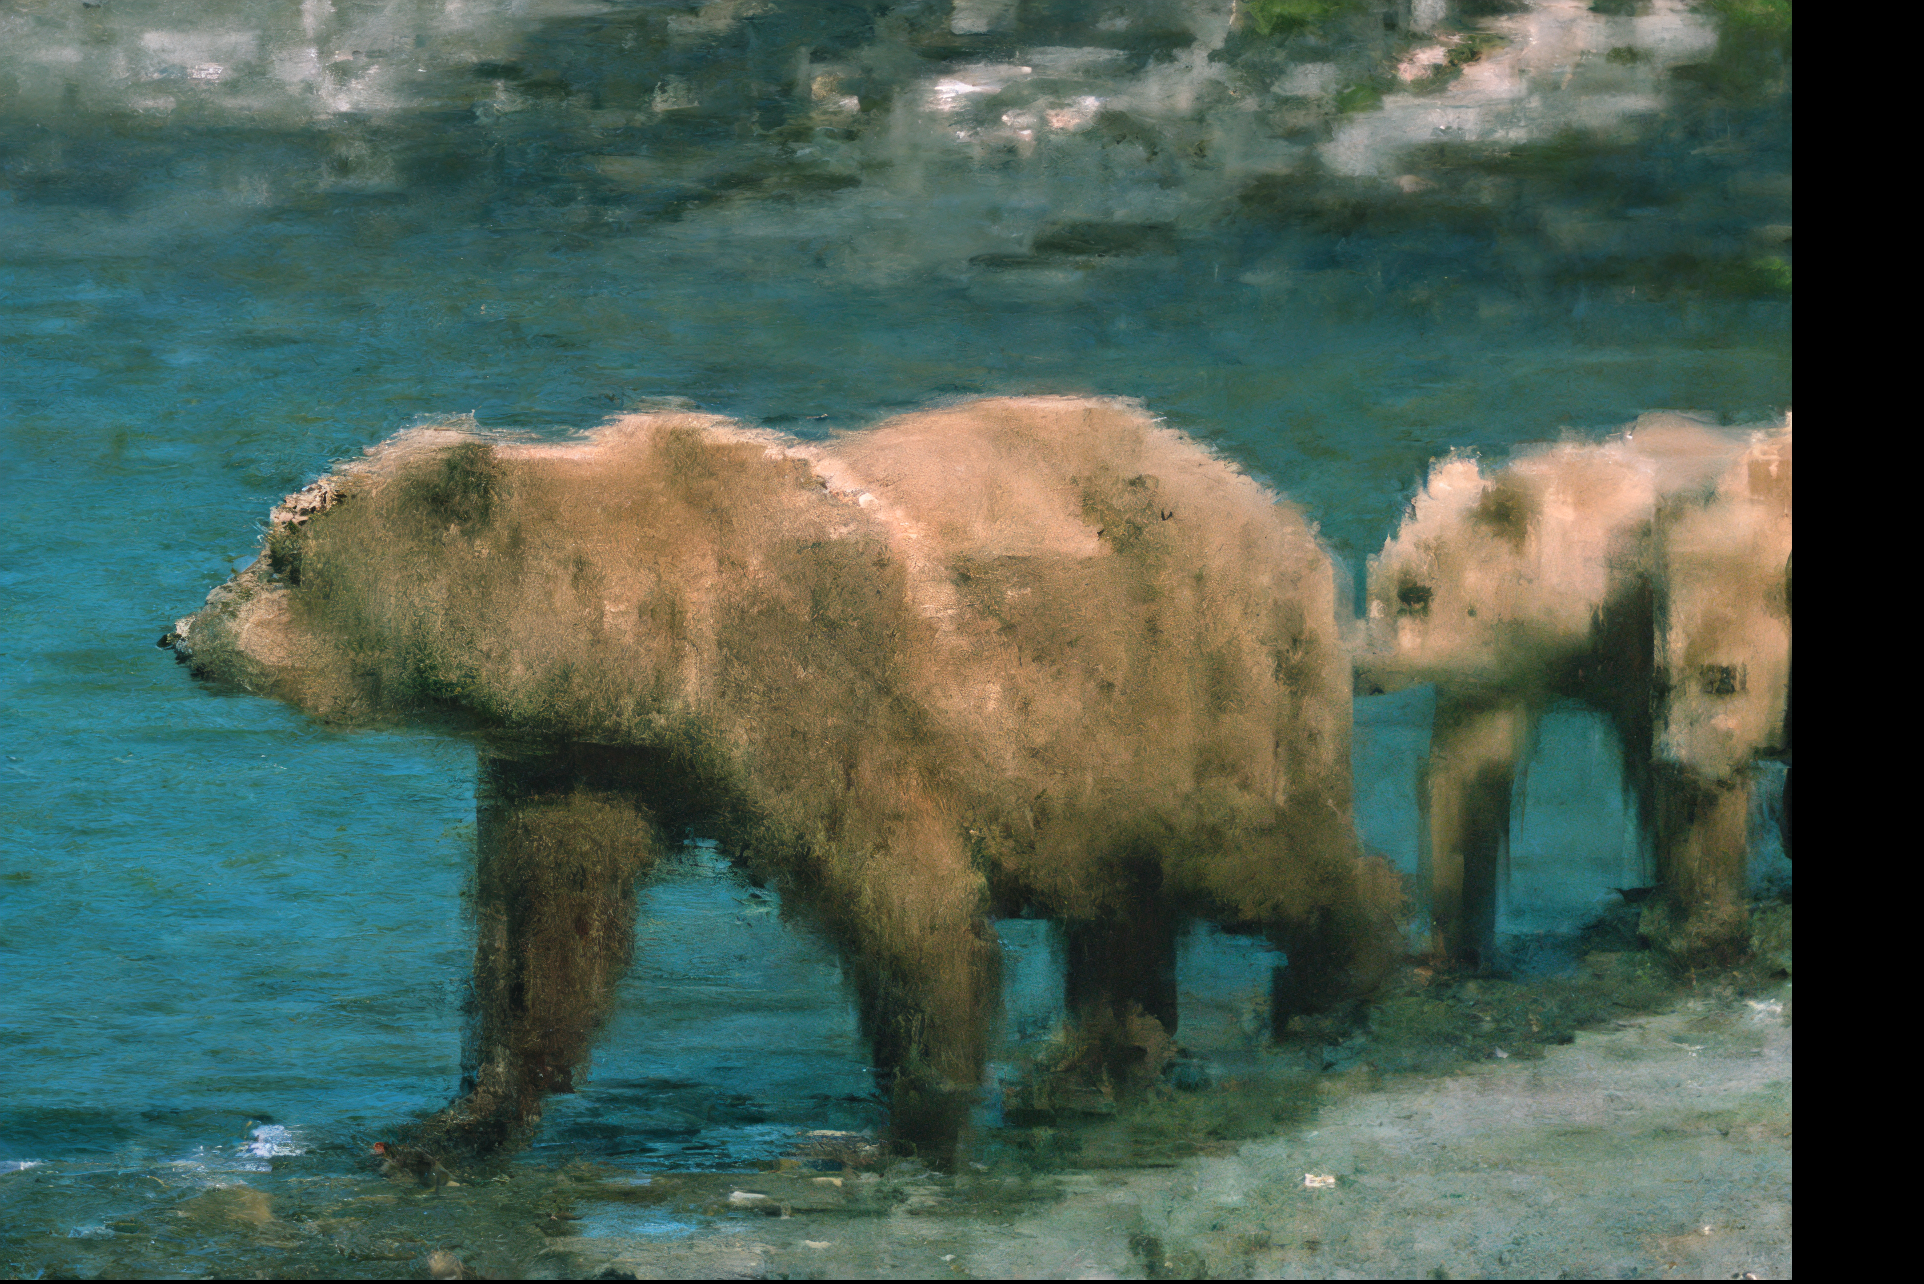

In [ ]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
